In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as splt
from google.oauth2 import service_account
from google.cloud import storage
import pandas as pd
import io

In [96]:
# Cargar las credenciales desde el archivo JSON
credentials = service_account.Credentials.from_service_account_file('credenciales.json')

# Crear un cliente de Storage con las credenciales
client = storage.Client(credentials=credentials)

# Obtén el bucket y el blob
bucket_name = 'pf-henry-esperanza-mlops'
file_name = 'Data-ML.csv'
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(file_name)

# Descargar el archivo a un DataFrame de Pandas
content = blob.download_as_bytes()
df = pd.read_csv(io.BytesIO(content),sep=';')
df.head()

,Pais,Continente,Anio,Valor,Indicador
0,Australia,Oceania,1987,8.533022,"Inflation, consumer prices (annual %)"
1,Australia,Oceania,1988,7.215940,"Inflation, consumer prices (annual %)"
2,Australia,Oceania,1989,7.533903,"Inflation, consumer prices (annual %)"
3,Australia,Oceania,1990,7.333022,"Inflation, consumer prices (annual %)"
4,Australia,Oceania,1991,3.176675,"Inflation, consumer prices (annual %)"


In [97]:
df.rename(columns={'Anio': 'Año'}, inplace=True)

In [98]:
df_pivot = pd.pivot_table(data=df, index=['Pais', "Año",'Continente'], columns='Indicador', values='Valor')
df_pivot.reset_index(inplace=True)
df_pivot

Indicador,Pais,Año,Continente,GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",...,"Population ages 65 and above, male","Population ages 65 and above, total",Population growth (annual %),"Population, female","Population, male","Population, total",Rural population,Rural population growth (annual %),Urban population,Urban population growth (annual %)
0,Afghanistan,1987,Asia,NaN,NaN,NaN,NaN,43.453000,36.739000,39.844000,...,111022.0,233845.0,-1.210190,5152650.0,5170108.0,10322758.0,8225793.0,-2.043746,2096965.0,2.128391
1,Afghanistan,1988,Asia,NaN,NaN,NaN,NaN,46.569000,41.572000,43.958000,...,110633.0,233853.0,0.586318,5188060.0,5195399.0,10383460.0,8203141.0,-0.275758,2180319.0,3.898014
2,Afghanistan,1989,Asia,NaN,NaN,NaN,NaN,47.610000,42.891000,45.158000,...,113325.0,240097.0,2.751877,5334609.0,5338559.0,10673168.0,8422410.0,2.637888,2250758.0,3.179585
3,Afghanistan,1990,Asia,NaN,NaN,NaN,NaN,48.397000,43.709000,45.967000,...,113182.0,240267.0,0.202434,5346409.0,5348387.0,10694796.0,8429959.0,0.089590,2264837.0,0.623574
4,Afghanistan,1991,Asia,NaN,NaN,NaN,NaN,49.144000,44.353000,46.663000,...,113494.0,241354.0,0.469880,5372208.0,5372959.0,10745167.0,8460100.0,0.356909,2285067.0,0.889255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,Venezuela,2018,Sudamérica,6084.479996,0.631865,35.063119,NaN,76.431000,67.832000,71.979000,...,925706.0,2151240.0,-2.443543,15021517.0,14804135.0,29825653.0,3517041.0,-2.655330,26308612.0,-2.415197
1580,Venezuela,2019,Sudamérica,6084.479996,0.631865,35.063119,NaN,76.566000,68.034000,72.161000,...,944115.0,2208384.0,-2.904996,14605811.0,14365872.0,28971683.0,3407070.0,-3.176733,25564613.0,-2.868725
1581,Venezuela,2020,Sudamérica,6084.479996,0.631865,35.063119,NaN,75.814000,66.739000,71.095000,...,968446.0,2277624.0,-1.674986,14376694.0,14113760.0,28490453.0,3339366.0,-2.007172,25151087.0,-1.630797
1582,Venezuela,2021,Sudamérica,6084.479996,0.631865,35.063119,NaN,75.207000,66.259000,70.554000,...,995189.0,2351344.0,-1.025179,14243056.0,13956811.0,28199867.0,3292334.0,-1.418423,24907533.0,-0.973083


In [99]:
df_pivot.dtypes

Indicador
Pais                                         object
Año                                           int64
Continente                                   object
GDP per capita (current US$)                float64
GDP per capita growth (annual %)            float64
Inflation, GDP deflator (annual %)          float64
Inflation, consumer prices (annual %)       float64
Life expectancy at birth, female (years)    float64
Life expectancy at birth, male (years)      float64
Life expectancy at birth, total (years)     float64
Population ages 0-14, female                float64
Population ages 0-14, male                  float64
Population ages 0-14, total                 float64
Population ages 15-64, female               float64
Population ages 15-64, male                 float64
Population ages 15-64, total                float64
Population ages 65 and above, female        float64
Population ages 65 and above, male          float64
Population ages 65 and above, total         float64
Po

In [100]:
df_pivot.columns

Index(['Pais', 'Año', 'Continente', 'GDP per capita (current US$)',
       'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Life expectancy at birth, total (years)',
       'Population ages 0-14, female', 'Population ages 0-14, male',
       'Population ages 0-14, total', 'Population ages 15-64, female',
       'Population ages 15-64, male', 'Population ages 15-64, total',
       'Population ages 65 and above, female',
       'Population ages 65 and above, male',
       'Population ages 65 and above, total', 'Population growth (annual %)',
       'Population, female', 'Population, male', 'Population, total',
       'Rural population', 'Rural population growth (annual %)',
       'Urban population', 'Urban population growth (annual %)'],
      dtype='object', name='Indicador')

In [101]:
df_pivot["ratio_population ages 65 and above"] = df_pivot["Population ages 65 and above, total"]/df_pivot["Population, total"]
df_pivot["ratio_urban population"] = df_pivot["Urban population"]/df_pivot["Population, total"]

In [102]:
columnas_seleccionadas = ["Pais","Año","Continente","GDP per capita (current US$)","Inflation, GDP deflator (annual %)", "Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Population growth (annual %)","ratio_population ages 65 and above","ratio_urban population", "Urban population growth (annual %)"]

In [103]:
df_pivot = df_pivot[columnas_seleccionadas]

In [104]:
df_pivot_años = df_pivot[df_pivot["Año"].isin([2017,2018,2019,2020,2021])]
df_pivot_años.reset_index(drop=True, inplace=True)
df_pivot_años

Indicador,Pais,Año,Continente,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,Afghanistan,2017,Asia,NaN,NaN,NaN,63.016,2.866492,0.023998,0.25250,3.781557
1,Afghanistan,2018,Asia,NaN,NaN,NaN,63.081,2.885208,0.024071,0.25495,3.850833
2,Afghanistan,2019,Asia,NaN,NaN,NaN,63.565,2.908529,0.024178,0.25754,3.919287
3,Afghanistan,2020,Asia,NaN,NaN,NaN,62.575,3.134747,0.024170,0.26026,4.185357
4,Afghanistan,2021,Asia,NaN,NaN,NaN,61.982,2.851358,0.024041,0.26314,3.951857
...,...,...,...,...,...,...,...,...,...,...,...
215,Venezuela,2017,Sudamérica,6084.479996,35.063119,NaN,71.943,-0.580807,0.068622,0.88183,-0.560394
216,Venezuela,2018,Sudamérica,6084.479996,35.063119,NaN,71.979,-2.443543,0.072127,0.88208,-2.415197
217,Venezuela,2019,Sudamérica,6084.479996,35.063119,NaN,72.161,-2.904996,0.076226,0.88240,-2.868725
218,Venezuela,2020,Sudamérica,6084.479996,35.063119,NaN,71.095,-1.674986,0.079943,0.88279,-1.630797


In [105]:
df_pivot_años.fillna(0, inplace=True)
df_pivot_años

C:\Users\felix\AppData\Local\Temp\ipykernel_22340\3946676365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_años.fillna(0, inplace=True)


Indicador,Pais,Año,Continente,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,Afghanistan,2017,Asia,0.000000,0.000000,0.0,63.016,2.866492,0.023998,0.25250,3.781557
1,Afghanistan,2018,Asia,0.000000,0.000000,0.0,63.081,2.885208,0.024071,0.25495,3.850833
2,Afghanistan,2019,Asia,0.000000,0.000000,0.0,63.565,2.908529,0.024178,0.25754,3.919287
3,Afghanistan,2020,Asia,0.000000,0.000000,0.0,62.575,3.134747,0.024170,0.26026,4.185357
4,Afghanistan,2021,Asia,0.000000,0.000000,0.0,61.982,2.851358,0.024041,0.26314,3.951857
...,...,...,...,...,...,...,...,...,...,...,...
215,Venezuela,2017,Sudamérica,6084.479996,35.063119,0.0,71.943,-0.580807,0.068622,0.88183,-0.560394
216,Venezuela,2018,Sudamérica,6084.479996,35.063119,0.0,71.979,-2.443543,0.072127,0.88208,-2.415197
217,Venezuela,2019,Sudamérica,6084.479996,35.063119,0.0,72.161,-2.904996,0.076226,0.88240,-2.868725
218,Venezuela,2020,Sudamérica,6084.479996,35.063119,0.0,71.095,-1.674986,0.079943,0.88279,-1.630797


In [106]:
df_pivot_años_group = df_pivot_años.groupby(["Pais","Continente"]).mean().drop(columns=['Año'])
df_pivot_años_group.reset_index(inplace=True)


In [107]:
df_pivot_años_group

Indicador,Pais,Continente,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,Afghanistan,Asia,0.000000,0.000000,0.000000,62.843800,2.929267,0.024091,0.257678,3.937778
1,Algeria,Africa,3876.636703,4.643434,4.290814,75.822600,1.817987,0.058449,0.731728,2.587228
2,Argentina,Sudamérica,11100.883304,42.292984,0.000000,76.479600,0.992777,0.115880,0.919900,1.123750
3,Australia,Oceania,55649.756424,2.702153,1.836326,82.929756,1.201004,0.159644,0.861286,1.331580
4,Austria,Europa,50282.610191,1.778456,1.951824,81.532683,0.495443,0.189736,0.585298,0.868419
5,Brazil,Sudamérica,8496.709453,6.049149,4.471526,74.406600,0.709181,0.090002,0.868184,1.003374
6,Burkina Faso,Africa,797.775144,2.025153,1.148705,59.724600,2.735475,0.025614,0.299856,4.829883
7,Cambodia,Asia,1561.749482,2.061665,2.635065,70.353600,1.197913,0.050328,0.238146,2.964984
8,Canada,América del Norte,46751.935346,2.903484,1.985314,82.034541,1.139466,0.176072,0.814916,1.226117
9,Chad,Africa,682.849261,1.928807,1.091377,52.738800,3.264345,0.020290,0.232994,4.215057


In [108]:
df_pivot_años_group.to_csv('data.csv',index=False)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

columnas = df_pivot_años_group.columns[2:]

df_pivot_años_group_escaler = scaler.fit_transform(df_pivot_años_group[columnas])

df_pivot_años_group_escaler = pd.DataFrame(df_pivot_años_group_escaler, columns=df_pivot_años_group.columns[2:])

df_pivot_años_group_escaler


Indicador,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,-0.937805,-0.466798,-0.981417,-1.506843,1.837343,-1.194228,-1.546286,1.699637
1,-0.782027,-0.143563,0.936988,0.161410,0.765558,-0.712417,0.314415,0.731372
2,-0.491729,2.477266,-0.981417,0.245859,-0.030324,0.092970,1.053012,-0.317856
3,1.298414,-0.278698,-0.160403,1.074942,0.170503,0.706689,0.822945,-0.168854
4,1.082742,-0.342998,-0.108765,0.895366,-0.509983,1.128686,-0.260339,-0.500913
5,-0.596375,-0.045710,1.017783,-0.020598,-0.303841,-0.269934,0.850021,-0.404159
6,-0.905747,-0.325825,-0.467836,-1.907775,1.650439,-1.172877,-1.380732,2.339224
7,-0.875048,-0.323283,0.196709,-0.541557,0.167521,-0.826299,-1.622951,1.002201
8,0.940866,-0.264683,-0.093792,0.959873,0.111152,0.937071,0.640938,-0.244465
9,-0.910366,-0.332532,-0.493467,-2.805708,2.160513,-1.247540,-1.643173,1.898430


In [111]:
df_pivot_años_group_escaler.to_csv('data_ML.csv',index=False)

In [112]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [113]:
df_escaler = pd.read_csv('data_ML.csv')

In [114]:
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [115]:
kmeans.fit(df_escaler)

cluster_labels = kmeans.labels_

df_cluster = df_escaler.assign(Cluster=cluster_labels)

C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [116]:
df_cluster

,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,-0.937805,-0.466798,-0.981417,-1.506843,1.837343,-1.194228,-1.546286,1.699637,0
1,-0.782027,-0.143563,0.936988,0.161410,0.765558,-0.712417,0.314415,0.731372,1
2,-0.491729,2.477266,-0.981417,0.245859,-0.030324,0.092970,1.053012,-0.317856,3
3,1.298414,-0.278698,-0.160403,1.074942,0.170503,0.706689,0.822945,-0.168854,2
4,1.082742,-0.342998,-0.108765,0.895366,-0.509983,1.128686,-0.260339,-0.500913,2
5,-0.596375,-0.045710,1.017783,-0.020598,-0.303841,-0.269934,0.850021,-0.404159,1
6,-0.905747,-0.325825,-0.467836,-1.907775,1.650439,-1.172877,-1.380732,2.339224,0
7,-0.875048,-0.323283,0.196709,-0.541557,0.167521,-0.826299,-1.622951,1.002201,4
8,0.940866,-0.264683,-0.093792,0.959873,0.111152,0.937071,0.640938,-0.244465,2
9,-0.910366,-0.332532,-0.493467,-2.805708,2.160513,-1.247540,-1.643173,1.898430,0


In [117]:
df_cluster = df_cluster.groupby("Cluster").mean()
df_cluster

,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
Cluster,,,,,,,,
0,-0.917391,-0.257775,-0.602090,-1.946403,1.910170,-1.179655,-1.473737,1.837388
1,-0.495509,-0.223776,0.118459,-0.056249,-0.068510,-0.510791,0.178527,-0.071450
2,1.157854,-0.326719,-0.323960,0.956621,-0.528501,1.131550,0.704296,-0.635564
3,-0.599050,3.308991,-0.981417,0.047244,-1.272242,0.077389,0.809508,-1.272544
4,-0.867406,-0.046289,1.579937,-0.821361,0.613507,-0.881269,-1.471325,0.966670


In [118]:
df_pivot_años_group_cluster = df_pivot_años_group.assign(Cluster=cluster_labels)
df_pivot_años_group_cluster

Indicador,Pais,Continente,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,Afghanistan,Asia,0.000000,0.000000,0.000000,62.843800,2.929267,0.024091,0.257678,3.937778,0
1,Algeria,Africa,3876.636703,4.643434,4.290814,75.822600,1.817987,0.058449,0.731728,2.587228,1
2,Argentina,Sudamérica,11100.883304,42.292984,0.000000,76.479600,0.992777,0.115880,0.919900,1.123750,3
3,Australia,Oceania,55649.756424,2.702153,1.836326,82.929756,1.201004,0.159644,0.861286,1.331580,2
4,Austria,Europa,50282.610191,1.778456,1.951824,81.532683,0.495443,0.189736,0.585298,0.868419,2
5,Brazil,Sudamérica,8496.709453,6.049149,4.471526,74.406600,0.709181,0.090002,0.868184,1.003374,1
6,Burkina Faso,Africa,797.775144,2.025153,1.148705,59.724600,2.735475,0.025614,0.299856,4.829883,0
7,Cambodia,Asia,1561.749482,2.061665,2.635065,70.353600,1.197913,0.050328,0.238146,2.964984,4
8,Canada,América del Norte,46751.935346,2.903484,1.985314,82.034541,1.139466,0.176072,0.814916,1.226117,2
9,Chad,Africa,682.849261,1.928807,1.091377,52.738800,3.264345,0.020290,0.232994,4.215057,0


In [119]:
df_pivot_años_group_cluster['Cluster'] = df_pivot_años_group_cluster['Cluster'].astype("str")

<Axes: xlabel='Cluster', ylabel='Life expectancy at birth, total (years)'>

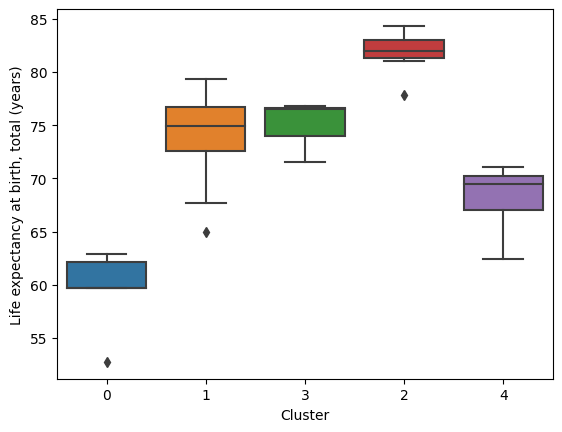

In [120]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'Life expectancy at birth, total (years)', x = 'Cluster')

<Axes: xlabel='Life expectancy at birth, total (years)', ylabel='Count'>

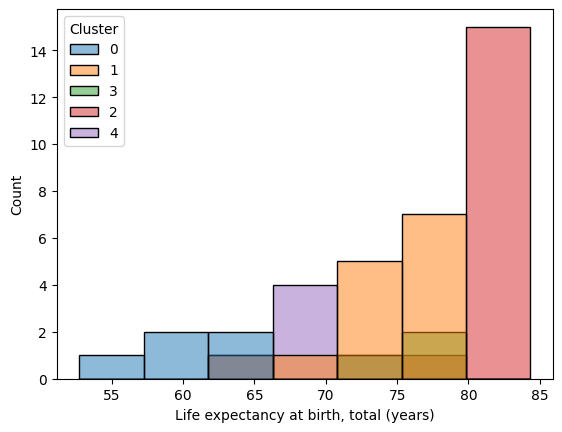

In [121]:
sns.histplot(data=df_pivot_años_group_cluster, x="Life expectancy at birth, total (years)", hue="Cluster")

<Axes: xlabel='Cluster', ylabel='GDP per capita (current US$)'>

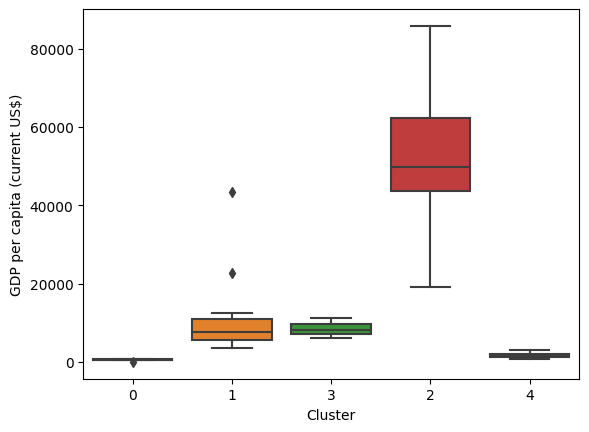

In [122]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'GDP per capita (current US$)', x = 'Cluster')

<Axes: xlabel='GDP per capita (current US$)', ylabel='Count'>

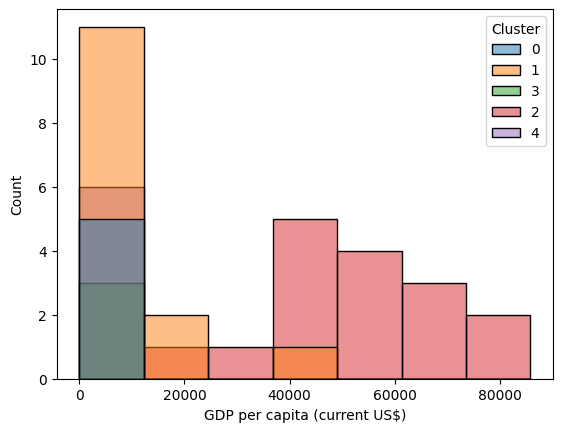

In [123]:
sns.histplot(data=df_pivot_años_group_cluster, x="GDP per capita (current US$)", hue="Cluster")

<Axes: xlabel='Cluster', ylabel='ratio_population ages 65 and above'>

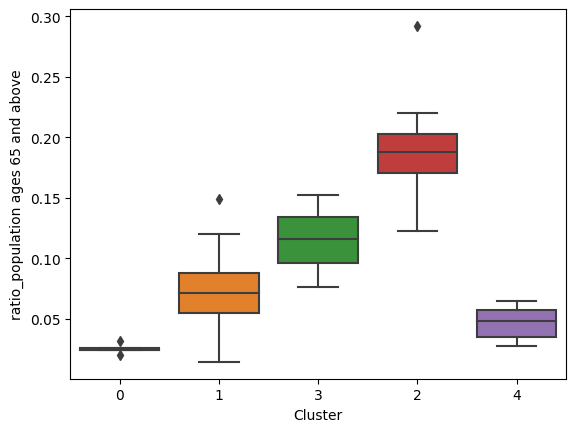

In [124]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'ratio_population ages 65 and above', x = 'Cluster')

<Axes: xlabel='ratio_population ages 65 and above', ylabel='Count'>

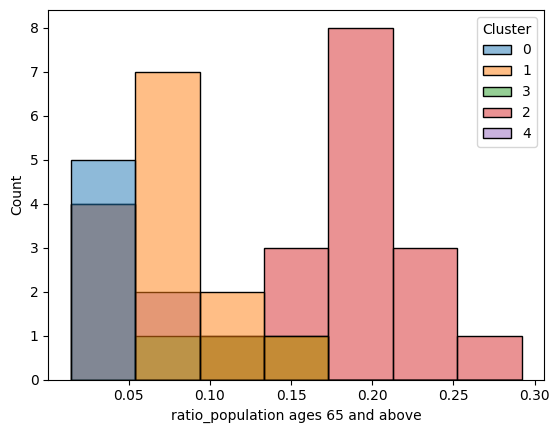

In [125]:
sns.histplot(data=df_pivot_años_group_cluster, x="ratio_population ages 65 and above", hue="Cluster")

<Axes: xlabel='Life expectancy at birth, total (years)', ylabel='GDP per capita (current US$)'>

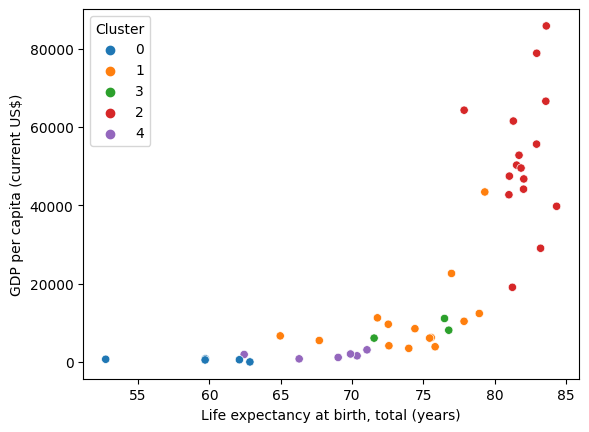

In [126]:
sns.scatterplot(data=df_pivot_años_group_cluster, x="Life expectancy at birth, total (years)", y="GDP per capita (current US$)", hue="Cluster")

In [127]:
df_pivot_años_group_cluster[df_pivot_años_group_cluster["Cluster"]=="2"]

Indicador,Pais,Continente,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
3,Australia,Oceania,55649.756424,2.702153,1.836326,82.929756,1.201004,0.159644,0.861286,1.331580,2
4,Austria,Europa,50282.610191,1.778456,1.951824,81.532683,0.495443,0.189736,0.585298,0.868419,2
8,Canada,América del Norte,46751.935346,2.903484,1.985314,82.034541,1.139466,0.176072,0.814916,1.226117,2
14,Denmark,Europa,61543.637762,1.671108,0.998526,81.302927,0.444475,0.197947,0.879962,0.580473,2
18,Finland,Europa,49537.818444,1.622952,1.069412,81.842927,0.165687,0.220397,0.854532,0.240830,2
19,Germany,Europa,47472.386809,2.100805,1.579774,81.024098,0.204758,0.217348,0.773892,0.287463,2
20,Greece,Europa,19066.981558,0.155130,0.395145,81.237073,-0.251670,0.219122,0.793846,0.165198,2
22,Japan,Asia,39763.039639,0.255376,0.336744,84.334537,-0.220673,0.292031,0.916996,-0.131214,2
27,Netherlands,Europa,52813.341870,2.215570,1.933367,81.700976,0.581848,0.192980,0.918502,1.004773,2
28,New Zealand,Oceania,44140.261113,3.037171,2.144880,82.017073,1.618306,0.153351,0.866214,1.708153,2


<h2>Gráfico de codo</h2>

In [128]:
valores = []

for i in range(2,11):

  modelo_kmeans_numcluster = KMeans(n_clusters = i, random_state = 123)
  modelo_kmeans_numcluster.fit(df_pivot_años_group_escaler)
  valores.append(modelo_kmeans_numcluster.inertia_)

C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

<Axes: >

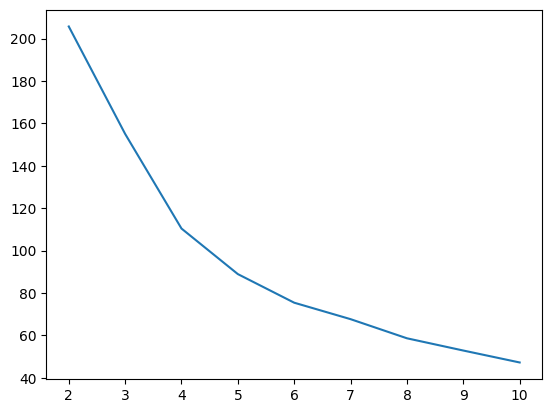

In [129]:
sns.lineplot(x = range(2,11), y = valores)

<h2>Coeficiente de silhoutte</h2>

In [130]:
from sklearn.metrics import silhouette_score, silhouette_samples

scores = []

for i in range(2,11):
  modelo_kmeans_numcluster = KMeans(n_clusters = i, random_state = 123)
  modelo_kmeans_numcluster.fit(df_pivot_años_group_escaler)
  etiquetas = modelo_kmeans_numcluster.labels_
  coef_silhouette = silhouette_score(df_pivot_años_group_escaler, etiquetas)
  scores.append(coef_silhouette)

C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

<Axes: >

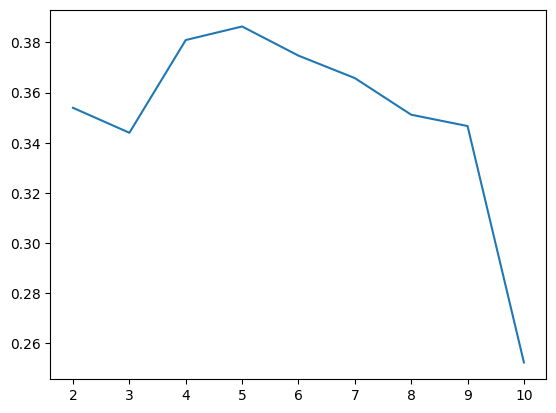

In [131]:
sns.lineplot(x = range(2,11), y = scores)